In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [139]:
consumer_key= '0oi787QixCO7FDDOyosil1wAk'
consumer_secret= 'xFx3TW8pdcqZvfHMlvzNBImggY6IE0Ppd3uXqHYAUcuXII6OTv'
access_token= '290391543-YAUvfwUCTBZpBy3G62LPJxkKwPWjrIkusCeuYinL'
access_token_secret= 'JUuPb9M6NbMeEFJRd8a6sOY0B7UZiuci5fNuDak89FJba'


In [140]:
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Using what you have learned,we will grab and clean up 1000 recent tweets. For this analysis, you only need to remove URLs from the tweets.

In [143]:
def remove_urls(txt):
    
    
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    
    
    #return " ".join(re.sub("([^0-9A-Za-z \t])|(\w:\/\/\S+)","",txt).split())
    

# Create a custom search term and define the number of tweets

In [187]:
search_term = "#climate+change -filter:retweets"

tweets = tw.Cursor(api.search,
                  q=search_term,
                  lang='en',
                  since='2020-06-06').items(1000)

##Remove URLs

tweet_no_url = [remove_urls(tweet.text) for tweet in tweets]

In [188]:
tweet_no_url[0:5]

['Yarra Valley Wine Growers Embrace Phylloxera Infestation As An Opportunity To Prepare For CLIMATE Change',
 'Yarra Valley Wine Growers Embrace Phylloxera Infestation As An Opportunity To Prepare For CLIMATE Change',
 'I am working in extreme climate conditions almost in the desertAndrey shares how FAO and theGEF support his',
 'Today we have the sustainable solutions ready to make real change for our climateLets RecoverBetter',
 'While the publics attention is consumed by concern over the global pandemic and protests against social injustice']

## Analyze Sentiments in Tweets

In [154]:
# Create textblob objects of the tweets

sentiment_object = [TextBlob(tweet) for tweet in tweet_no_url]

sentiment_object[100].polarity,sentiment_object[100]



(0.0,
 TextBlob("One take away from globalcompact session on climate change is the call to embrace diversity businesses"))

## You can apply list comprehension to create a list of the polarity values and text for each tweet, and then create a Pandas Dataframe from the list.

In [155]:
# Create list of polarity valuesx and tweet text

sentiment_values = [[tweet.sentiment.polarity , str(tweet)] for tweet in sentiment_object]

sentiment_values[9]

[0.0,
 'Unilever announced that it will be investing 1bn in its fight against climate change and incorporating']

In [156]:
# Create dataframe containing the polarity value and tweet text

sentiment_df = pd.DataFrame(sentiment_values,columns=['polarity','tweet'])

sentiment_df.head(10)

,polarity,tweet
0,0.000,Hear from the expertsDont miss tomorrows mega ...
1,0.500,What nitrogen is getting up to in permafrost s...
2,0.000,HSG Researchers Alexander Braun Sebastian Utz ...
3,0.250,China could adopt a climate response centered ...
4,0.000,Akava is now member of CLCfi Climate Leadershi...
5,0.000,The effects of climate change on coastlines an...
6,-0.125,These five art projects explore the impacts of...
7,0.000,Well just wait As climate change accelerates a...
8,0.000,climate Links to CLIMATE CHANGE and SCIENCE vi...
9,0.000,Unilever announced that it will be investing 1...


## These polarity values can be plotted in a histogram, which can help to highlight in the overall sentiment (i.e. more positivity or negativity) toward the subject.

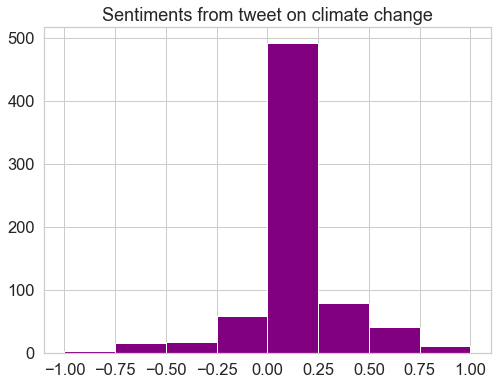

In [157]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1],
                 ax=ax,
                 color='purple')
plt.title("Sentiments from tweet on climate change")
plt.show()

## To get a better visual of the polarity values, it can be helpful to remove the polarity values equal to zero and create a break in the histogram at zero.

In [158]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

In [159]:
sentiment_df.head(10)

,polarity,tweet
1,0.500000,What nitrogen is getting up to in permafrost s...
3,0.250000,China could adopt a climate response centered ...
6,-0.125000,These five art projects explore the impacts of...
10,0.246753,New Special Issue Land Use and Climate Change ...
12,0.100000,Australia has almost three times as many clima...
13,0.214286,the opportunity to go snorkelling on a living ...
19,0.007143,Cattle change the ecosystem they are healthful...
20,0.200000,DegrowthControversial idea but capable of savi...
22,-0.100000,The impact of climate change on financial stab...
23,0.500000,Agricultures Role in Addressing Climate Change...


In [160]:
# Remove polarity values equal to zero

sentiment_df = sentiment_df[sentiment_df['polarity'] != 0]

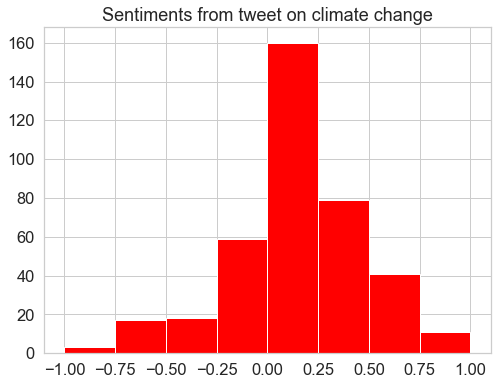

In [161]:
fig, ax = plt.subplots(figsize=(8,6))

sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1],
                 ax=ax,
                 color='red')
plt.title('Sentiments from tweet on climate change')
plt.show()

# Get and Analyze Tweets Related to Corona Virus

In [162]:
tweet_search = "#CoronaVirus -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=tweet_search,
                   lang='en',
                   since='2020-03-09').items(500)


# Remove URLs and create textblob object for each tweet
no_url_tweet = [TextBlob(remove_urls(tweet.text))for tweet in tweets]




In [163]:
no_url_tweet[:5]

[TextBlob("Beijing Must be strict in epidemic prevention and control and make every effortCovid19 Coronavirus"),
 TextBlob("Are you Blind or PartiallySighted and have questions about the current Covid19 Coronavirus situationWeve wor"),
 TextBlob("Delhis Health Minister SatyendarJain has been hospitalised has been tested for Covid again Coronavirus"),
 TextBlob("EUROPE European Commission says We support the development and deployment of universal and affordable vaccines t"),
 TextBlob("Singapore reports 247 new COVID19 cases including 5 in the community COVID19 coronavirus")]

In [164]:
no_url_tweet[1].sentiment,no_url_tweet[1]

(Sentiment(polarity=-0.25, subjectivity=0.5333333333333333),
 TextBlob("Are you Blind or PartiallySighted and have questions about the current Covid19 Coronavirus situationWeve wor"))

In [165]:
# Create list of polarity valuesx and tweet text

sentiment_value = [[text.sentiment.polarity,str(text)] for text in no_url_tweet]
sentiment_value[0:3]

[[0.0,
  'Beijing Must be strict in epidemic prevention and control and make every effortCovid19 Coronavirus'],
 [-0.25,
  'Are you Blind or PartiallySighted and have questions about the current Covid19 Coronavirus situationWeve wor'],
 [0.0,
  'Delhis Health Minister SatyendarJain has been hospitalised has been tested for Covid again Coronavirus']]

In [166]:
sentiments_df = pd.DataFrame(sentiment_value,columns=['polarity','tweets'])
sentiments_df = sentiments_df[sentiments_df.polarity !=0]

In [167]:
sentiments_df.head()

,polarity,tweets
1,-0.250000,Are you Blind or PartiallySighted and have que...
4,0.136364,Singapore reports 247 new COVID19 cases includ...
5,0.500000,Lalit Gulati of Modelama Exports believes that...
6,0.750000,Best office ever KishoreDayani Follow theentfa...
8,0.100000,100000 unpaid carers in the UK relied on food ...


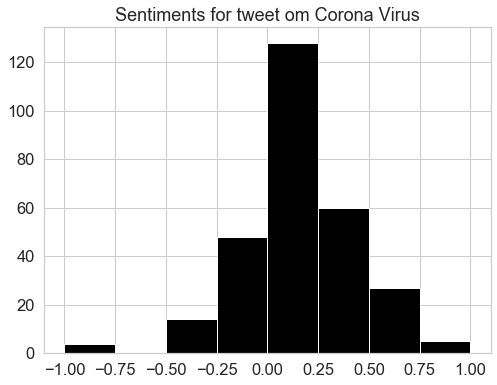

In [168]:
fig,ax = plt.subplots(figsize=(8,6))

sentiments_df.hist(bins=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1],
                  ax=ax,
                  color="black")
plt.title('Sentiments for tweet om Corona Virus')
plt.show()

# Create a WordCloud

In [169]:
from wordcloud import WordCloud

In [170]:
all_words = ' '.join([word for word in sentiments_df['tweets']])

In [171]:
wc = WordCloud(width=500,height=300,max_font_size=119,random_state=21).generate(all_words)

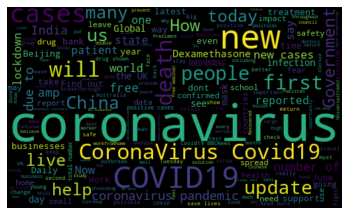

In [172]:
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [175]:
## From different document

In [174]:
##  keyword Covid19

public_tweet = api.search('Sushant Singh')

for tweet in public_tweet:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    print()

RT @ANI: I have filed a case against 8 people including Karan Johar, Sanjay Leela Bhansali, Salman Khan &amp; Ekta Kapoor under Sections 306, 1…
Sentiment(polarity=0.0, subjectivity=0.0)

Sushant Singh Rajput: Boycott Karan Johar, YRF films, Salman Khan - Sign the Petition! https://t.co/dpUewxR8OR via @Change
Sentiment(polarity=0.0, subjectivity=0.0)

“Sushant Singh Rajput: Boycott Karan Johar, YRF films, Salman Khan ” — पेटीशन पर साइन करें! https://t.co/Fv8gvmQva1 via @ChangeOrg_India
Sentiment(polarity=0.0, subjectivity=0.0)

RT @MrsGandhi: The lesser know facts about Sushant Singh Rajput... Asli Hero! https://t.co/WUBOIYOF2U
Sentiment(polarity=0.0, subjectivity=0.5)

In connection with Sushant Singh Rajput's suicide case, a case has been filed against Bollywood biggies Salman Khan… https://t.co/LkeAhOajVj
Sentiment(polarity=0.0, subjectivity=0.0)

RT @Secretmediahker: Sushant Singh Rajput Speech At IIT Bombay Part 4 #SushanthSinghRajput https://t.co/Pum2Syx3xp
Sentiment(polarity=0.0